In [26]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("LONGITUDINAL.csv")
df.head()


,ID,GROUP,AGE,Week,Score,PSR_Compliant_EC,PSR_Compliant_EO,PSR_Firm_EC,PSR_Firm_EO,Gaitsymmetry_Walk_HF,Gaitsymmetry_Walk_HT,Steplength_Walk_HF,Steplength_Walk_HT,Steptime_Walk_HF,Steptime_Walk_HT,Stepvelocity_Walk_HF,Stepvelocity_Walk_HT
0,1,Active,A,0,23.00,2.449264,2.870729,3.022863,2.994831,58.741242,60.758268,0.538958,0.553679,0.67,0.68,0.801715,0.816422
1,1,Active,A,6,17.67,2.608000,3.007683,3.058034,3.004069,62.676928,52.087552,0.505224,0.519363,0.66,0.70,0.740778,0.780507
2,1,Active,A,12,12.67,2.835134,2.959680,3.676394,3.814218,61.337303,61.568876,0.609362,0.616855,0.64,0.63,0.930661,0.982006
3,2,Active,A,0,21.00,2.293872,2.625070,3.350297,3.404530,65.413925,66.124260,0.585015,0.548978,0.67,0.64,0.868019,0.853078
4,2,Active,A,6,10.67,2.379210,2.927952,3.100223,3.264655,64.427727,66.920432,0.566429,0.531554,0.75,0.68,0.739722,0.796473


In [27]:
print(list(df))

['ID', 'GROUP', 'AGE', 'Week', 'Score', 'PSR_Compliant_EC', 'PSR_Compliant_EO', 'PSR_Firm_EC', 'PSR_Firm_EO', 'Gaitsymmetry_Walk_HF', 'Gaitsymmetry_Walk_HT', 'Steplength_Walk_HF', 'Steplength_Walk_HT', 'Steptime_Walk_HF', 'Steptime_Walk_HT', 'Stepvelocity_Walk_HF', 'Stepvelocity_Walk_HT']


In [28]:
# Remove all rows with any NaN values
df_cleaned = df.dropna()

# Check the new shape
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)
df = df_cleaned.copy()

Original shape: (499, 17)
Cleaned shape: (498, 17)


In [29]:
# Make sure AGE column exists and is correctly formatted
print(df['AGE'].unique())  # Optional: to inspect the values

# Split into adult and children datasets
df_adult = df[df['AGE'] == 'A'].copy()
df_child = df[df['AGE'] == 'C'].copy()

# Check sizes
print("Adults:", df_adult.shape)
print("Children:", df_child.shape)


['A' 'C']
Adults: (289, 17)
Children: (209, 17)


In [30]:

# Further split by GROUP
df_adult_active = df_adult[df_adult['GROUP'] == 'Active'].copy()
df_adult_passive = df_adult[df_adult['GROUP'] == 'Passive'].copy()
df_child_active = df_child[df_child['GROUP'] == 'Active'].copy()
df_child_passive = df_child[df_child['GROUP'] == 'Passive'].copy()

# Check sizes
print("👨‍🦱 Adult Active:", df_adult_active.shape)
print("👨‍🦱 Adult Passive:", df_adult_passive.shape)
print("🧒 Child Active:", df_child_active.shape)
print("🧒 Child Passive:", df_child_passive.shape)

👨‍🦱 Adult Active: (145, 17)
👨‍🦱 Adult Passive: (144, 17)
🧒 Child Active: (111, 17)
🧒 Child Passive: (98, 17)


In [31]:
# List of groups and labels
groups = [
    (df_adult_active, 'Adult Active'),
    (df_adult_passive, 'Adult Passive'),
    (df_child_active, 'Child Active'),
    (df_child_passive, 'Child Passive')
]

# Function to summarize
def summarize(df_subset, label):
    summary = df_subset[vars_to_summarize].describe().loc[['mean', 'std', 'min', 'max']].T
    summary['Variable'] = summary.index
    summary['Group'] = label
    return summary[['Group', 'Variable', 'mean', 'std', 'min', 'max']]

# Loop through each group and print
for df_subset, label in groups:
    print(f"\n===== Summary for {label} =====")
    display(summarize(df_subset, label))  



===== Summary for Adult Active =====


NameError: name 'vars_to_summarize' is not defined

In [25]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "Gaitsymmetry_Walk_HT ~ C(Week) * GROUP",
    data=df,
    groups=df["ID"]
)
result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Gaitsymmetry_Walk_HT
No. Observations:    498       Method:               REML                
No. Groups:          170       Scale:                22.0045             
Min. group size:     2         Log-Likelihood:       -1616.5035          
Max. group size:     3         Converged:            Yes                 
Mean group size:     2.9                                                 
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      58.375    0.803 72.733 0.000 56.802 59.948
C(Week)[T.6]                    0.055    0.713  0.077 0.938 -1.342  1.452
C(Week)[T.12]                   2.658    0.725  3.666 0.000  1.237  4.078
GROUP[T.Passive]                0.072    1.156  0.062 0.

MODEL FOR ADULT ACTIVE

C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\Users\ASUS\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Gaitsymmetry_Walk_HT
No. Observations: 145     Method:             REML                
No. Groups:       50      Scale:              14.1299             
Min. group size:  2       Log-Likelihood:     -424.2912           
Max. group size:  3       Converged:          No                  
Mean group size:  2.9                                             
--------------------------------------------------------------------
                Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
--------------------------------------------------------------------
Intercept       62.070      0.900   68.956   0.000   60.306   63.834
C(Week)[T.6]    24.755                                              
C(Week)[T.12]   54.372                                              
Week            -4.483                                              
Group Var       26.383      2.092                              

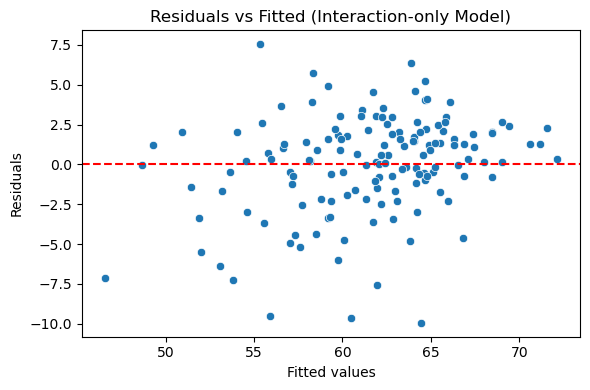

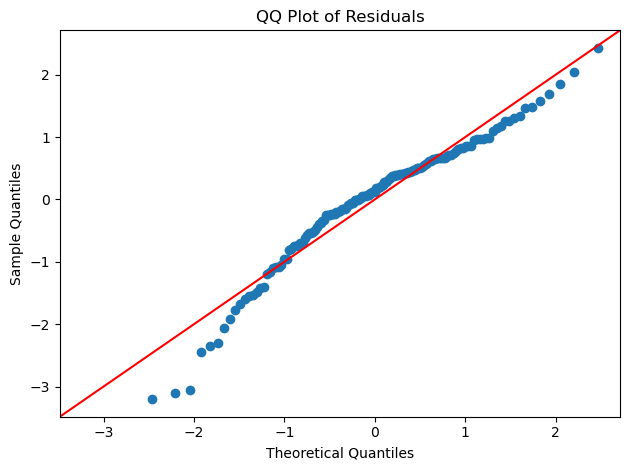

PatsyError: missing '(' or extra ')'
    Gaitsymmetry_Walk_HT ~ C(Week) + (GROUP)*(AGE) + (GROUP)*(Week))
                                                                   ^

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

model = smf.mixedlm(
    "Gaitsymmetry_Walk_HT ~ C(Week) + GROUP*AGE + GROUP*Week",
    data=df_adult_active,
    groups=df_adult_active["ID"]
)
result = model.fit()
print(result.summary())


# Residuals vs fitted for interaction-only model
fitted_vals = result.fittedvalues
residuals = result.resid

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Interaction-only Model)")
plt.tight_layout()
plt.show()


import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()



from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Construct design matrix (without grouping)
y, X = dmatrices("Gaitsymmetry_Walk_HT ~ C(Week) + (GROUP)*(AGE) + (GROUP)*(Week))", data=df_adult_active, return_type='dataframe') #CHANGE DEPENDANT VARIABLE HERE


vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)





var_fixed = np.var(result.fittedvalues)
var_resid = result.scale  # residual variance
var_random = float(result.cov_re.iloc[0])  # random intercept variance

# Compute R² values
R2_marginal = var_fixed / (var_fixed + var_random + var_resid)
R2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_resid)

print(f"🔷 Marginal R² (fixed effects): {R2_marginal:.4f}")
print(f"🔷 Conditional R² (fixed + random): {R2_conditional:.4f}")



MODEL FOR ADULT PASSIVE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model = smf.mixedlm("Gaitsymmetry_Walk_HT ~ C(Week)", data=df_adult_passive, groups=df_adult_passive["ID"]) #CHANGE DEPENDANT VARIABLE HERE

result = model.fit()
print(result.summary())


# Residuals vs fitted for interaction-only model
fitted_vals = result.fittedvalues
residuals = result.resid

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Interaction-only Model)")
plt.tight_layout()
plt.show()


import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()



from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Construct design matrix (without grouping)
y, X = dmatrices("Gaitsymmetry_Walk_HT ~ C(Week)", data=df_adult_passive, return_type='dataframe') #CHANGE DEPENDANT VARIABLE HERE


vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


var_fixed = np.var(result.fittedvalues)
var_resid = result.scale  # residual variance
var_random = float(result.cov_re.iloc[0])  # random intercept variance

# Compute R² values
R2_marginal = var_fixed / (var_fixed + var_random + var_resid)
R2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_resid)

print(f"🔷 Marginal R² (fixed effects): {R2_marginal:.4f}")
print(f"🔷 Conditional R² (fixed + random): {R2_conditional:.4f}")



MODEL FOR CHILD ACTIVE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model = smf.mixedlm("Gaitsymmetry_Walk_HT ~ C(Week)", data=df_child_active, groups=df_child_active["ID"]) #CHANGE DEPENDANT VARIABLE HERE

result = model.fit()
print(result.summary())


# Residuals vs fitted for interaction-only model
fitted_vals = result.fittedvalues
residuals = result.resid

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Interaction-only Model)")
plt.tight_layout()
plt.show()


import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()



from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Construct design matrix (without grouping)
y, X = dmatrices("Gaitsymmetry_Walk_HT ~ C(Week)", data=df_child_active, return_type='dataframe') #CHANGE DEPENDANT VARIABLE HERE


vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)



var_fixed = np.var(result.fittedvalues)
var_resid = result.scale  # residual variance
var_random = float(result.cov_re.iloc[0])  # random intercept variance

# Compute R² values
R2_marginal = var_fixed / (var_fixed + var_random + var_resid)
R2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_resid)

print(f"🔷 Marginal R² (fixed effects): {R2_marginal:.4f}")
print(f"🔷 Conditional R² (fixed + random): {R2_conditional:.4f}")



MODEL FOR CHILD PASIVE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

model = smf.mixedlm("Gaitsymmetry_Walk_HT ~ C(Week)", data=df_child_passive, groups=df_child_passive["ID"]) #CHANGE DEPENDANT VARIABLE HERE
result = model.fit()
print(result.summary())


# Residuals vs fitted for interaction-only model
fitted_vals = result.fittedvalues
residuals = result.resid

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Interaction-only Model)")
plt.tight_layout()
plt.show()


import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()



from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Construct design matrix (without grouping)
y, X = dmatrices("Gaitsymmetry_Walk_HT ~ C(Week)", data=df_child_passive, return_type='dataframe') #CHANGE DEPENDANT VARIABLE HERE

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


var_fixed = np.var(result.fittedvalues)
var_resid = result.scale  # residual variance
var_random = float(result.cov_re.iloc[0])  # random intercept variance

# Compute R² values
R2_marginal = var_fixed / (var_fixed + var_random + var_resid)
R2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_resid)

print(f"🔷 Marginal R² (fixed effects): {R2_marginal:.4f}")
print(f"🔷 Conditional R² (fixed + random): {R2_conditional:.4f}")

